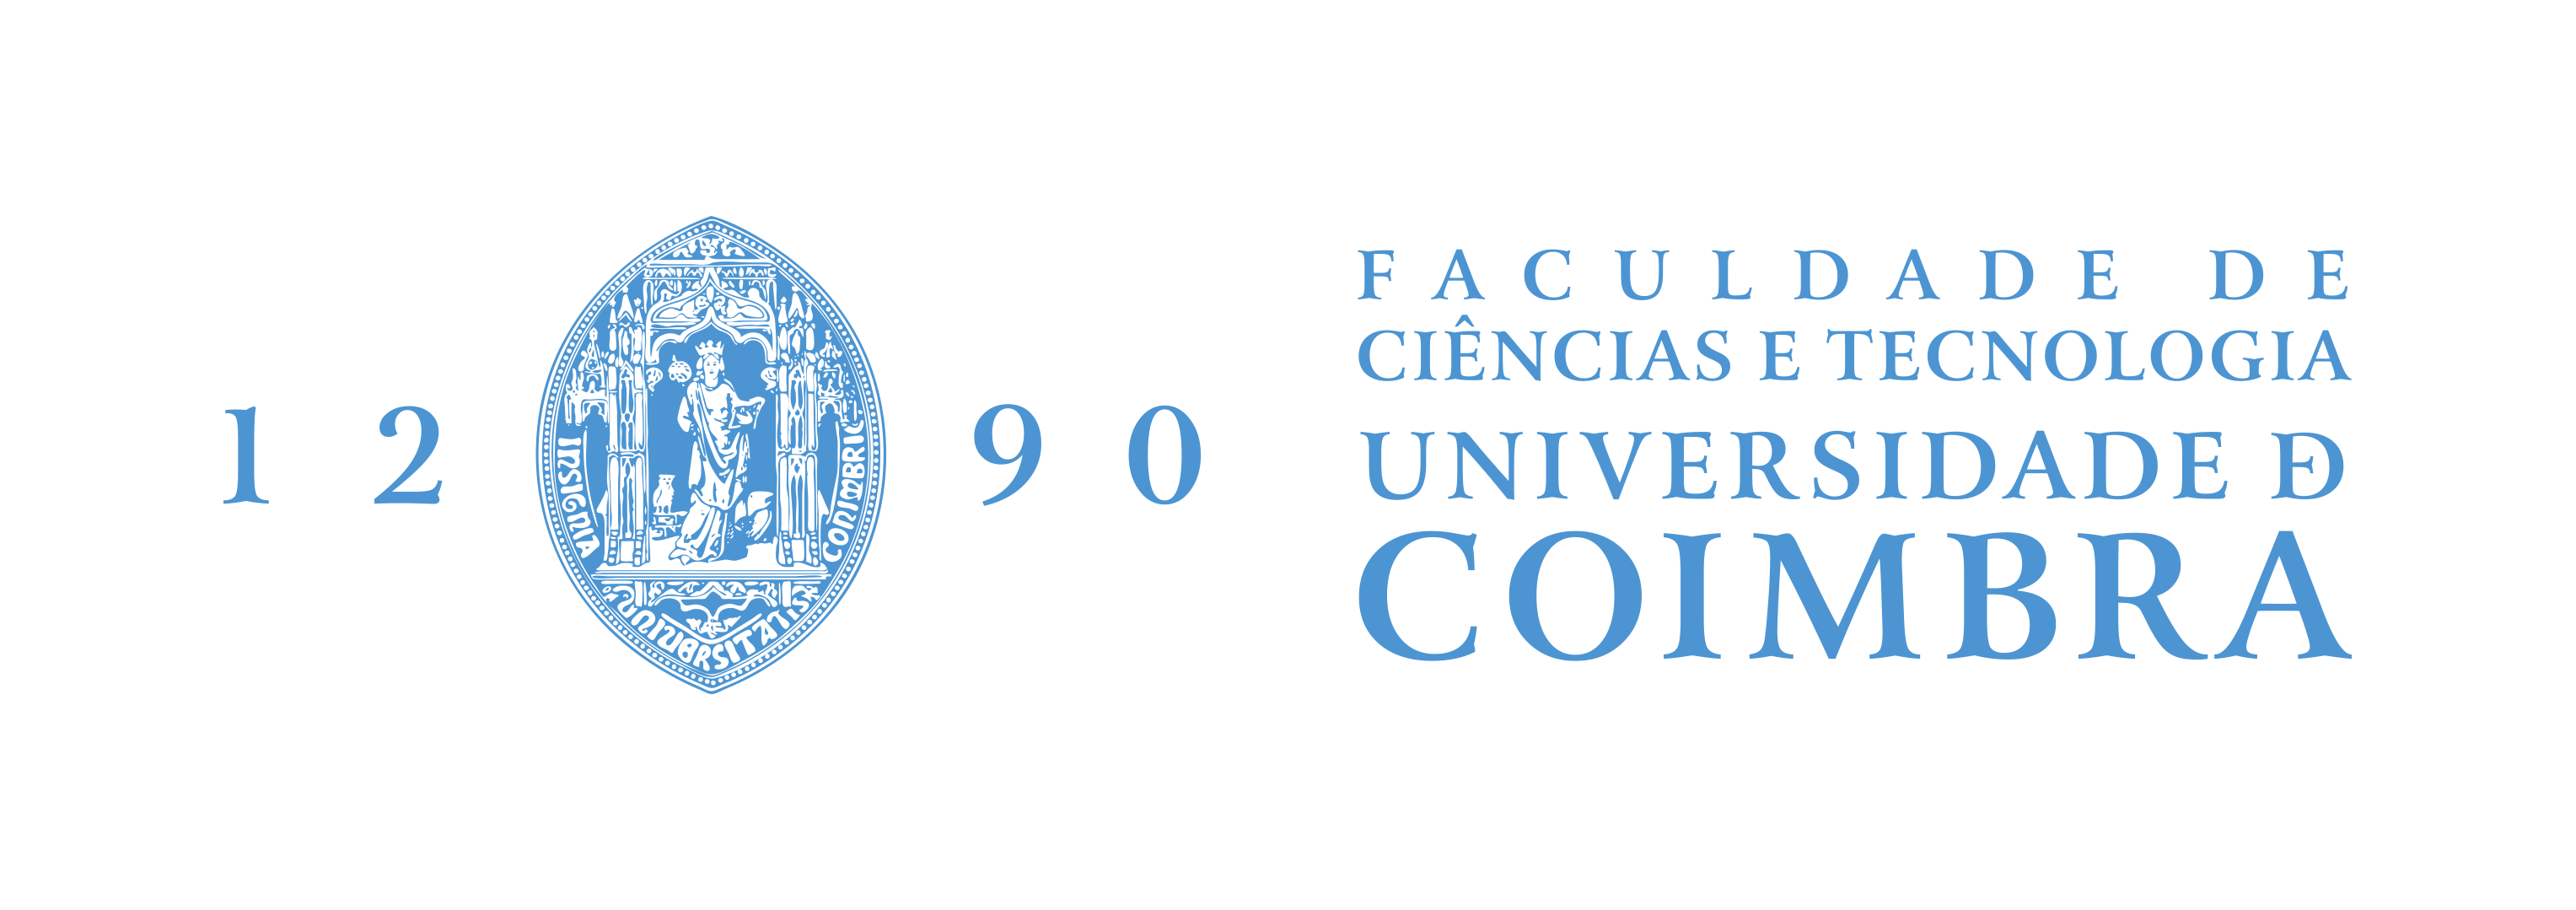
# PROJETO DE ANÁLISE E TRANSFORMAÇÃO DE DADOS
## Relatório + Código

#### Trabalho realizado por:
   - Filipe Ribeiro - Nº 2019223576
   - Miguel Ferreira - Nº 2019214567
   - Tiago Oliveira - Nº 2019219068

## Introdução
No âmbito da cadeira de Análise e Transformação de Dados realizamos um mini-projeto, onde analisamos uma Data Set composto por 12  atividades. O objetivo foi classificar/analisar os dados, nos domínios de tempo e frequência.
A Data Base está dividido em 3 grupos distintos:
- Dinâmicos:
    1. Andando (WALKING) 
    2. Subindo Escadas (WALKING_UPSTAIRS) 
    3. Descendo Escadas (WALKING_DOWNSTAIRS)
- Estáticos
    4. Sentado (SITTING) 
    5. De pé (STANDING) 
    6. Deitado (LAYING)
- Transição
    7. De pé  Sentado (STAND_TO_SIT) 
    8. Sentado  De pé (SIT_TO_STAND) 
    9. Sentado  Deitado (SIT_TO_LIE) 
    10. Deitado  Sentado (LIE_TO_SIT) 
    11. De pé  Deitado (STAND_TO_LIE) 
    12. Deitado  De pé (LIE_TO_STAND)

Estas atividades foram captadas a uma frequência constante de 50 Hz , usando sinais recolhidos através de acelerômetros de smartphones recolhendo dados dos 3 eixos espaciais (X ,Y ,Z).

Neste relatório analisamos e discutimos os resultados obtidos, de acordo com as perguntas propostas pelo professor da cadeira e pela Data Set atribuída a cada turma prática (acc_exp42_user21.txt a acc_exp49_user24.txt).


### Exercicio 1


Para importarmos os valores utilizamos a função “open_users_data” para ler os valores presentes nos ficheiros de cada experiência e a função “open_labels” para a leitura do ficheiro “labels”, que contém as informações referentes aos intervalos de cada atividade para cada experiência.

### Exercicio 2

De seguida, estes sinais são processados pela função “plot_signals_activities”, que apresenta um gráfico para cada sinal, separando cada atividade com uma cor e identificando-a com o seu devido nome.


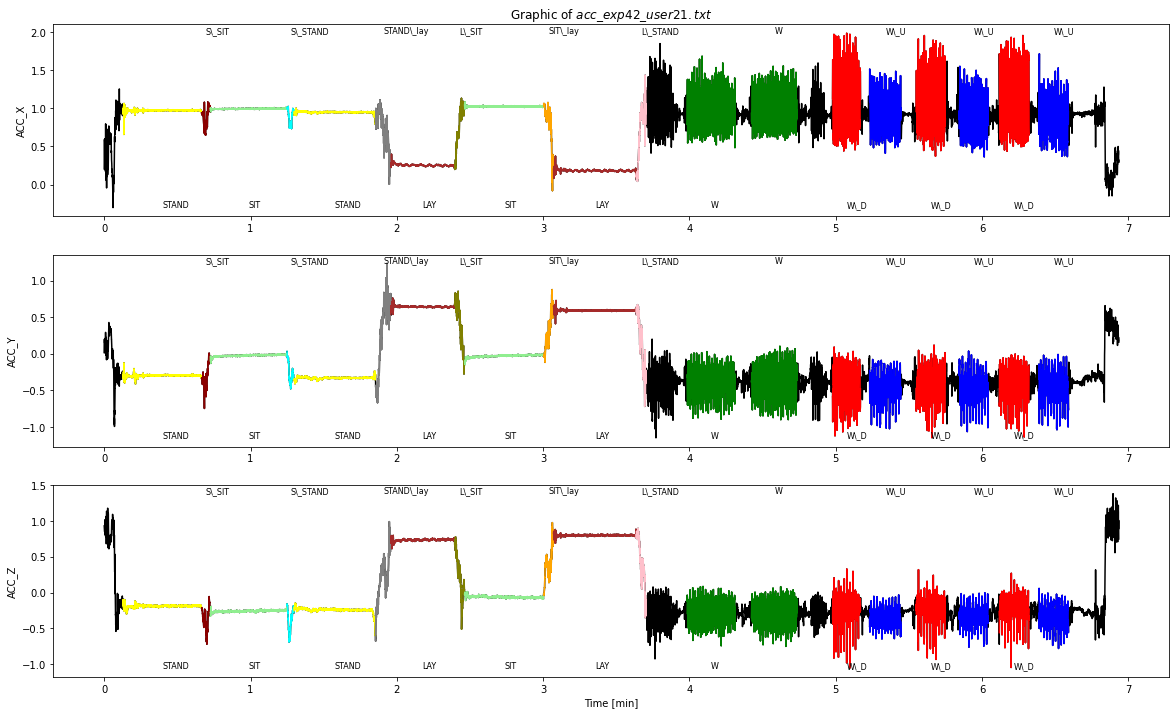

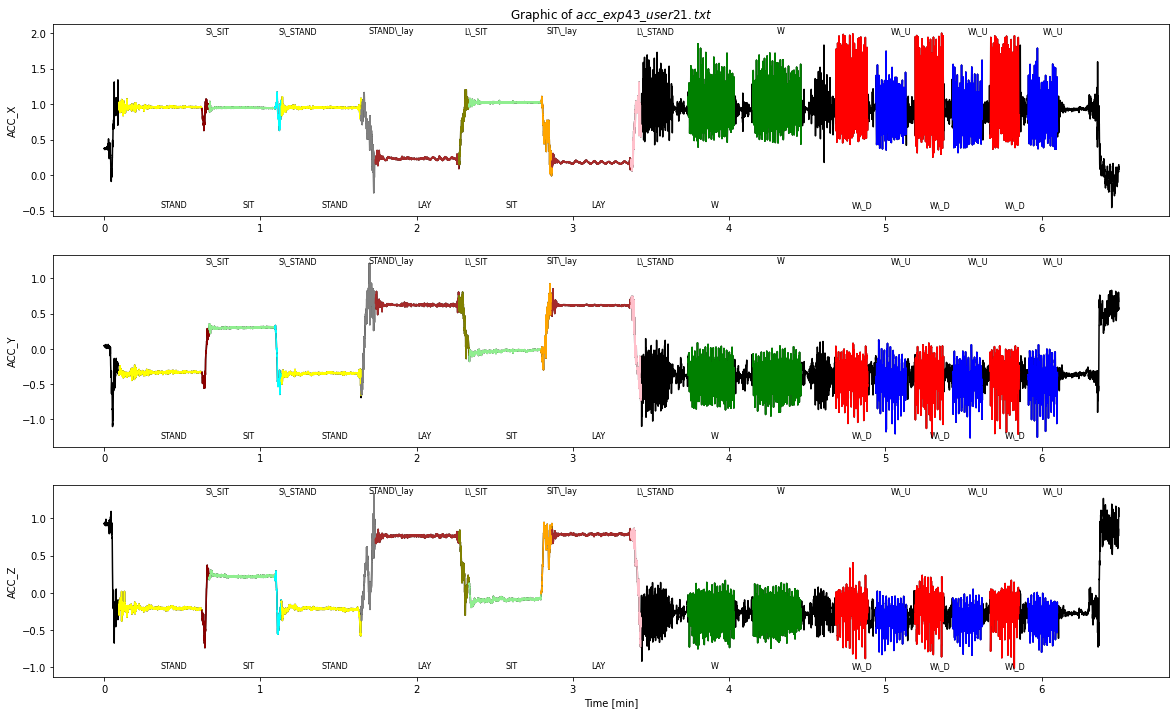

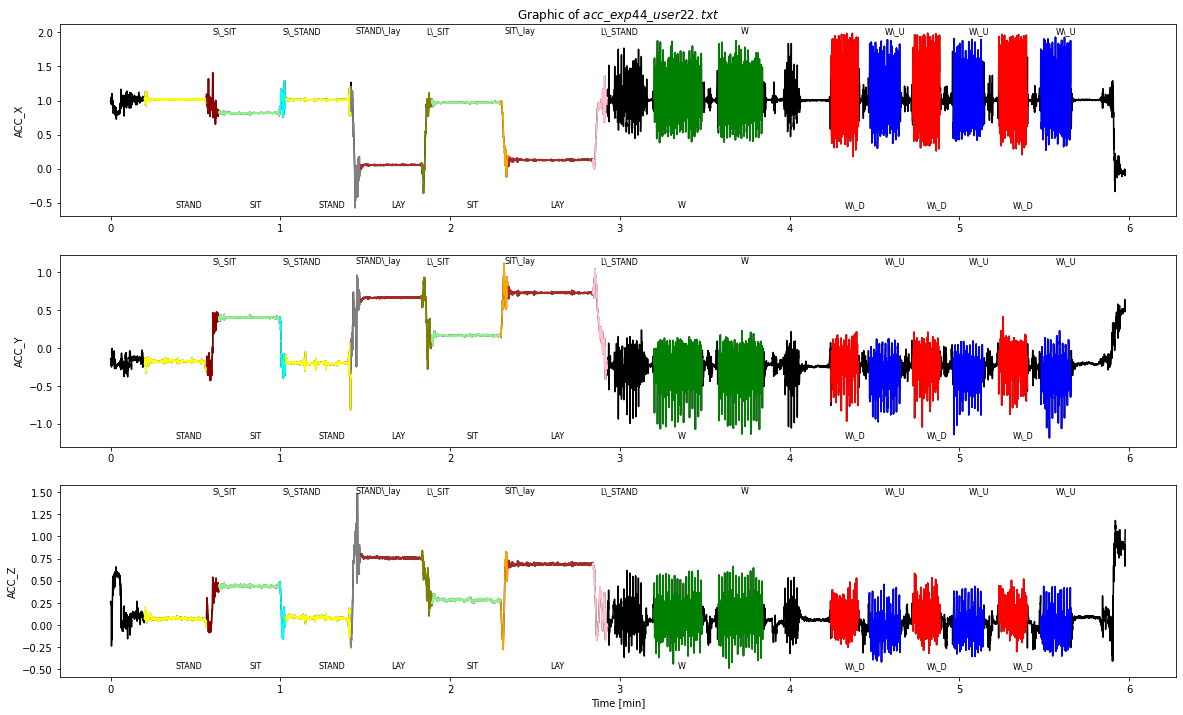

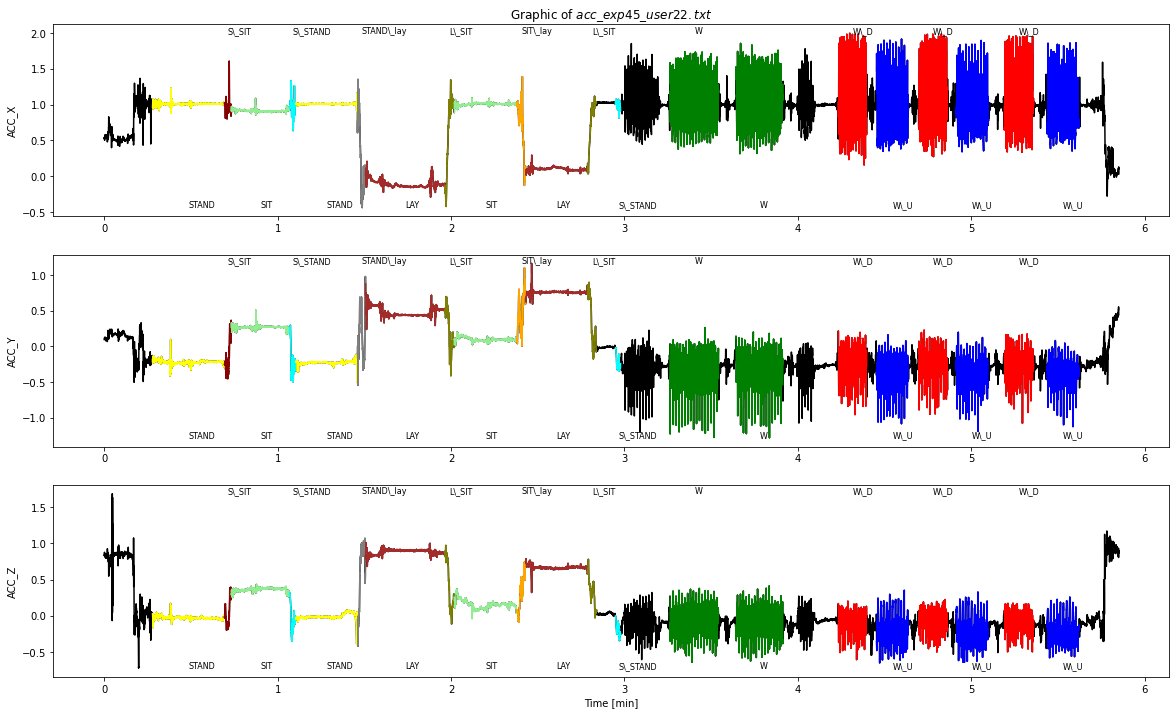

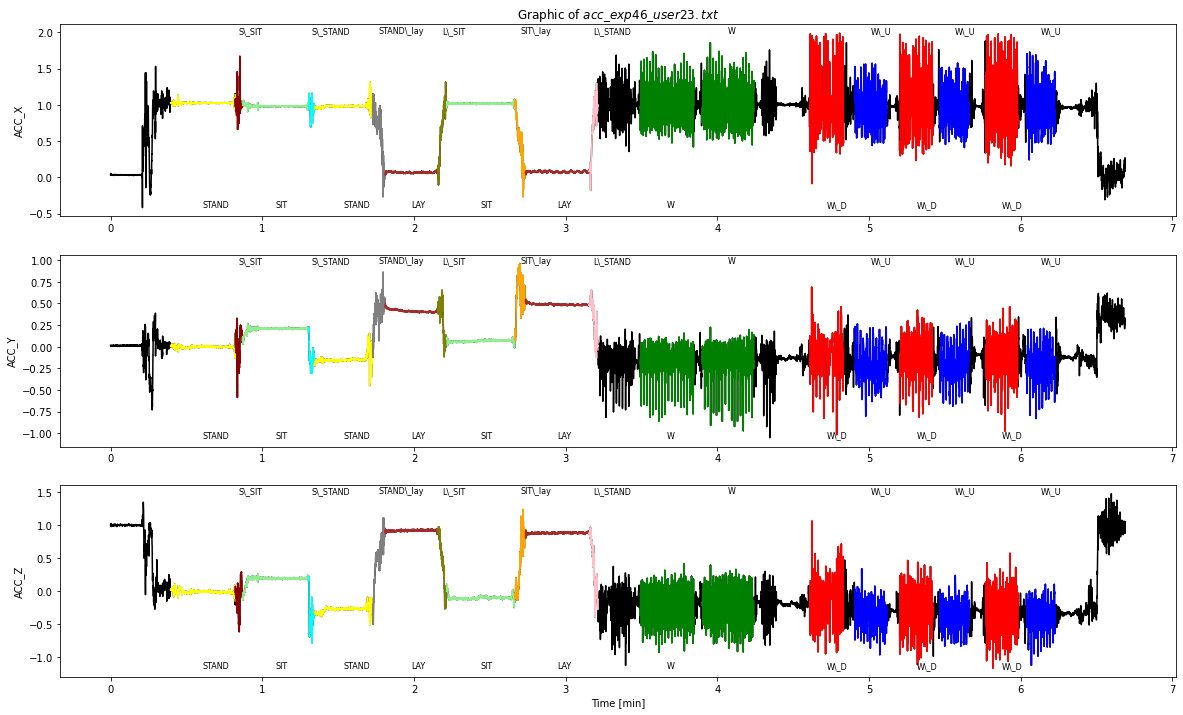

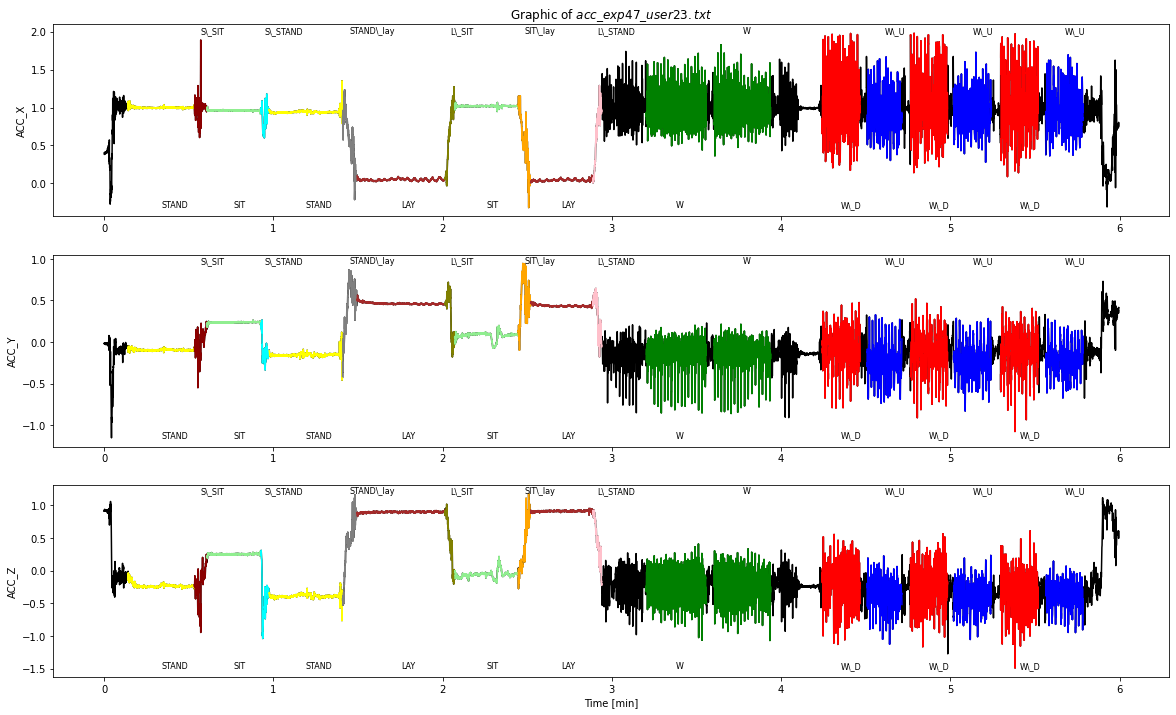

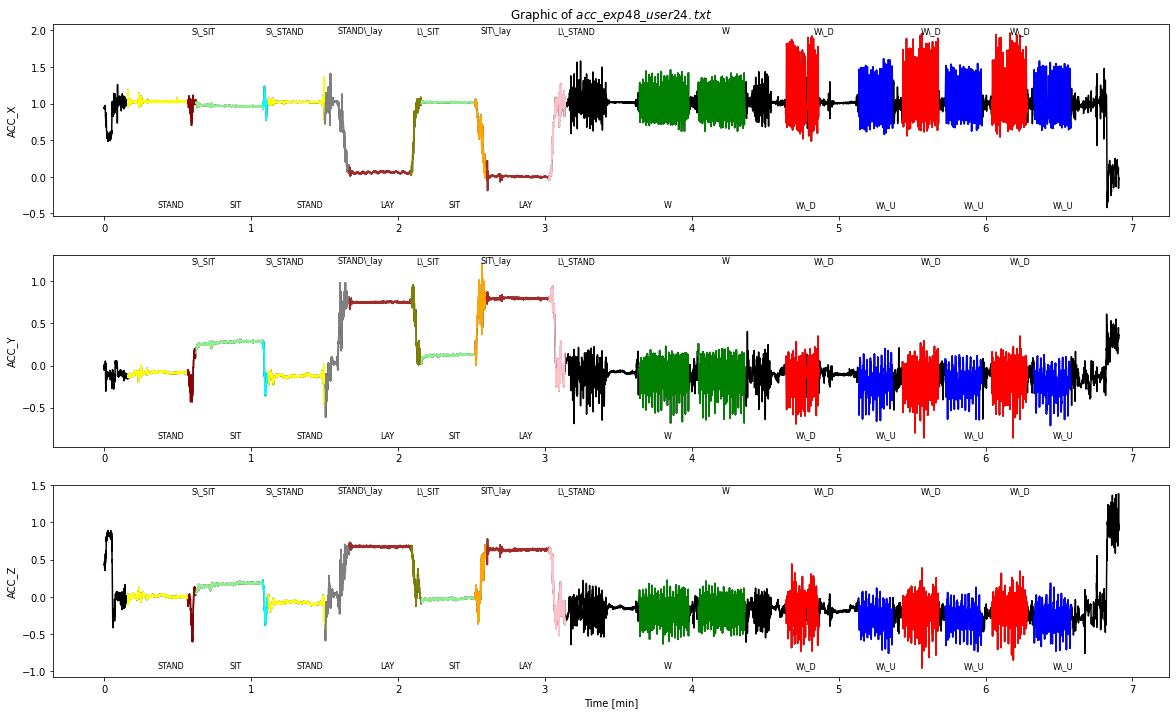

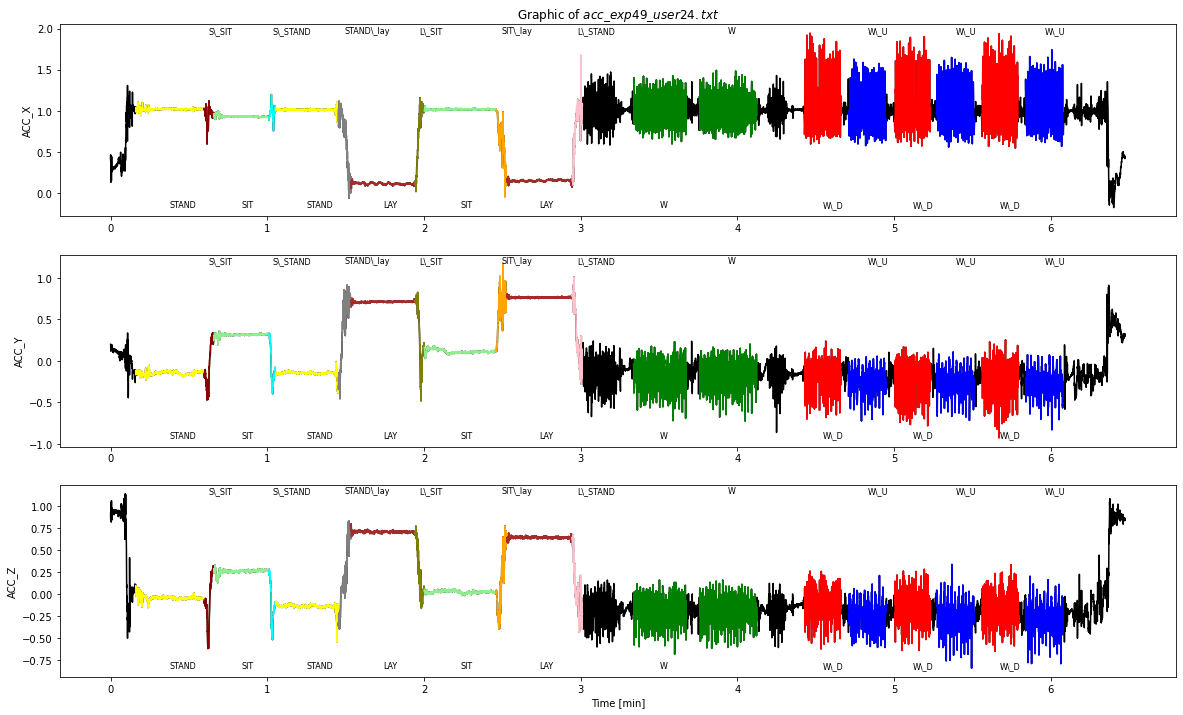

In [1]:
# Imports necessários para a realização do projeto
import matplotlib.pyplot as plt
import numpy as np

# Apenas são usados para o exercício 3
from numpy.fft import fft, fftshift
import scipy.signal as sigs

# Variáveis necessárias para importar data de diferentes ficheiros de dados
user = [21, 22, 23, 24]
exp = [42, 43, 44, 45, 46, 47, 48, 49]

atividades = ['W', 'W\_U', 'W\_D', 'SIT', 'STAND', 'LAY',
              'S\_SIT', 'S\_STAND', 'SIT\_lay', 'L\_SIT', 'STAND\_lay', 'L\_STAND']

# Frequência de amostragem definida no site referenciado no enunciado
frequency = 50

colors = ["green", "blue", "red", "lightgreen", "yellow", "brown",
                  "darkred", "cyan", "orange", "olive", "gray", "pink"]

# Arrays onde serão guardadas as informações dos ficheiros entrada
# Cada atividade possui 3 arrays, correspondendo cada um a um sensor diferente
# Dinâmicos
w_x = [[], [], [], [], [], [], [], []]
w_y = [[], [], [], [], [], [], [], []]
w_z = [[], [], [], [], [], [], [], []]
w_u_x = [[], [], [], [], [], [], [], []]
w_u_y = [[], [], [], [], [], [], [], []]
w_u_z = [[], [], [], [], [], [], [], []]
w_d_x = [[], [], [], [], [], [], [], []]
w_d_y = [[], [], [], [], [], [], [], []]
w_d_z = [[], [], [], [], [], [], [], []]

# Estáticos
sit_x = [[], [], [], [], [], [], [], []]
sit_y = [[], [], [], [], [], [], [], []]
sit_z = [[], [], [], [], [], [], [], []]
stand_x = [[], [], [], [], [], [], [], []]
stand_y = [[], [], [], [], [], [], [], []]
stand_z = [[], [], [], [], [], [], [], []]
lay_x = [[], [], [], [], [], [], [], []]
lay_y = [[], [], [], [], [], [], [], []]
lay_z = [[], [], [], [], [], [], [], []]

# Transição
stand_sit_x = [[], [], [], [], [], [], [], []]
stand_sit_y = [[], [], [], [], [], [], [], []]
stand_sit_z = [[], [], [], [], [], [], [], []]
sit_stand_x = [[], [], [], [], [], [], [], []]
sit_stand_y = [[], [], [], [], [], [], [], []]
sit_stand_z = [[], [], [], [], [], [], [], []]
sit_lay_x = [[], [], [], [], [], [], [], []]
sit_lay_y = [[], [], [], [], [], [], [], []]
sit_lay_z = [[], [], [], [], [], [], [], []]
lay_sit_x = [[], [], [], [], [], [], [], []]
lay_sit_y = [[], [], [], [], [], [], [], []]
lay_sit_z = [[], [], [], [], [], [], [], []]
stand_lay_x = [[], [], [], [], [], [], [], []]
stand_lay_y = [[], [], [], [], [], [], [], []]
stand_lay_z = [[], [], [], [], [], [], [], []]
lay_stand_x = [[], [], [], [], [], [], [], []]
lay_stand_y = [[], [], [], [], [], [], [], []]
lay_stand_z = [[], [], [], [], [], [], [], []]

# Array auxiliar que será usado posteriormente para o cálculo das magnitudes
array_activities = [w_x, w_y, w_z, w_u_x, w_u_y, w_u_z,
                    w_d_x, w_d_y, w_d_z, sit_x, sit_y, sit_z,
                    stand_x, stand_y, stand_z, lay_x, lay_y, lay_z, stand_sit_x, stand_sit_y,
                    stand_sit_z, sit_stand_x, sit_stand_y, sit_stand_z, sit_lay_x, sit_lay_y, sit_lay_z, lay_sit_x,
                    lay_sit_y, lay_sit_z, stand_lay_x, stand_lay_y, stand_lay_z, lay_stand_x, lay_stand_y,
                    lay_stand_z]

for n in range(8):
    # Nome do ficheiro a ser aberto
    filename = "acc_exp%d_user%d.txt" % (exp[n], user[n//2])
    
    # Abre o ficheiro com dados de um sinal
    # Guarda a data do user no array arr
    arr = open_users_data(exp[i], user[i // 2])

    # Abre o ficheiro labels
    labels = open_labels(exp, user)
    
    # Arrays com dados de cada sensor
    x = []
    y = []
    z = []
    
    # Array com os valores de tempo, em segundos, de cada valor da experiência
    tempo = []
    
    # Guarda os valores de tempo e os dados de cada sensor nos seus respetivos arrays
    for i in arr:
        tempo.append(len(x)/(frequency*60))
        x.append(i[0])
        y.append(i[1])
        z.append(i[2])
    
    # Cria os gráficos de cada sinal com as devidas atividades identificadas
    plot_signals_activities(exp[n], user[n//2])
    
    # De acordo com o utilizador pretendido é feita a separação das atividades 
    # realizadas e os valores são guardados nos arrays acima definidos para usar no seguimento do projeto
    for i in labels:
        # Dinâmicos
        if i[0] == 1:
            w_x[n].append(x[i[1]:i[2]])
            w_y[n].append(y[i[1]:i[2]])
            w_z[n].append(z[i[1]:i[2]])
        elif i[0] == 2:
            w_u_x[n].append(x[i[1]:i[2]])
            w_u_y[n].append(y[i[1]:i[2]])
            w_u_z[n].append(z[i[1]:i[2]])
        elif i[0] == 3:
            w_d_x[n].append(x[i[1]:i[2]])
            w_d_y[n].append(y[i[1]:i[2]])
            w_d_z[n].append(z[i[1]:i[2]])

        # Estáticos
        elif i[0] == 4:
            sit_x[n].append(x[i[1]:i[2]])
            sit_y[n].append(y[i[1]:i[2]])
            sit_z[n].append(z[i[1]:i[2]])
        elif i[0] == 5:
            stand_x[n].append(x[i[1]:i[2]])
            stand_y[n].append(y[i[1]:i[2]])
            stand_z[n].append(z[i[1]:i[2]])
        elif i[0] == 6:
            lay_x[n].append(x[i[1]:i[2]])
            lay_y[n].append(y[i[1]:i[2]])
            lay_z[n].append(z[i[1]:i[2]])

        # Transição
        elif i[0] == 7:
            stand_sit_x[n].append(x[i[1]:i[2]])
            stand_sit_y[n].append(y[i[1]:i[2]])
            stand_sit_z[n].append(z[i[1]:i[2]])
        elif i[0] == 8:
            sit_stand_x[n].append(x[i[1]:i[2]])
            sit_stand_y[n].append(y[i[1]:i[2]])
            sit_stand_z[n].append(z[i[1]:i[2]])
        elif i[0] == 9:
            sit_lay_x[n].append(x[i[1]:i[2]])
            sit_lay_y[n].append(y[i[1]:i[2]])
            sit_lay_z[n].append(z[i[1]:i[2]])
        elif i[0] == 10:
            lay_sit_x[n].append(x[i[1]:i[2]])
            lay_sit_y[n].append(y[i[1]:i[2]])
            lay_sit_z[n].append(z[i[1]:i[2]])
        elif i[0] == 11:
            stand_lay_x[n].append(x[i[1]:i[2]])
            stand_lay_y[n].append(y[i[1]:i[2]])
            stand_lay_z[n].append(z[i[1]:i[2]])
        elif i[0] == 12:
            lay_stand_x[n].append(x[i[1]:i[2]])
            lay_stand_y[n].append(y[i[1]:i[2]])
            lay_stand_z[n].append(z[i[1]:i[2]])


### Exercícios 3.1,  3.2 e 3.4
No exercício 3.1, dividimos o sinal pelas diversas atividades enunciadas anteriormente, onde analisamos o sinal de cada atividade separadamente.
Deste modo ao dar plot do sinal em questão, retiramos a tendência com o auxílio da função ___detrend___, onde o seu primeiro argumento recebe um array onde o sinal está guardado e retorna o mesmo mas sem a tendência. O uso da função ___detrend___ permite-nos analisar com mais rigor vários padrões existentes ao longo de toda o período de existência da atividade a ser analisada. Sem o uso do ___detrend___ não seria possível identificar esses padrões, sendo apenas visível um pico mais elevado que todos os outros, correspondente à tendência dos dados.

Uma vez que temos o sinal livre de tendência podemos calcular a sua DFT e analisar com rigor todos os padrões existentes menos _intensos_.


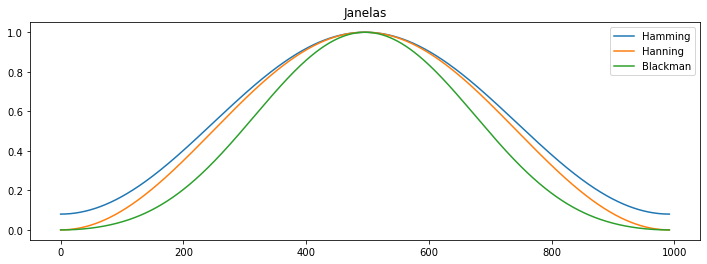

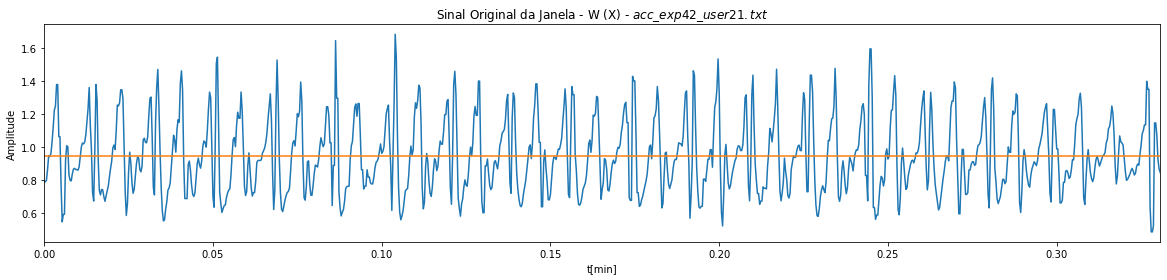

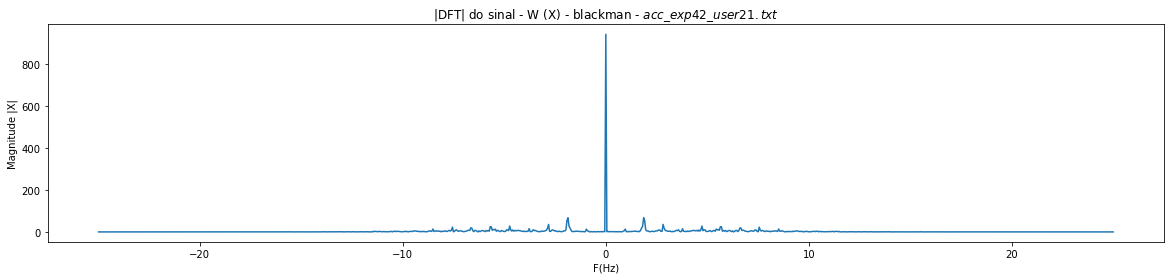

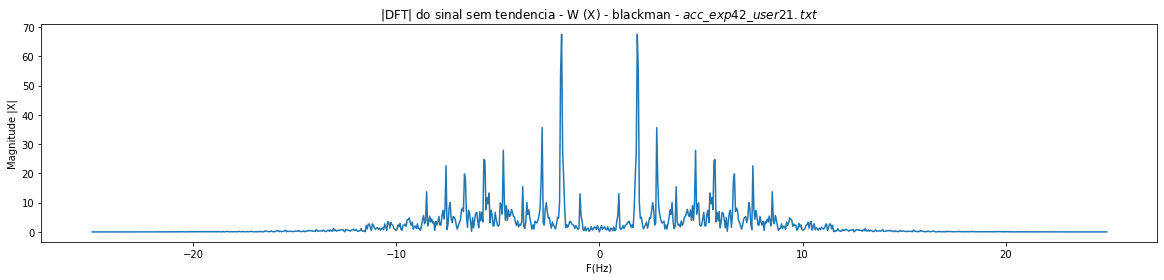

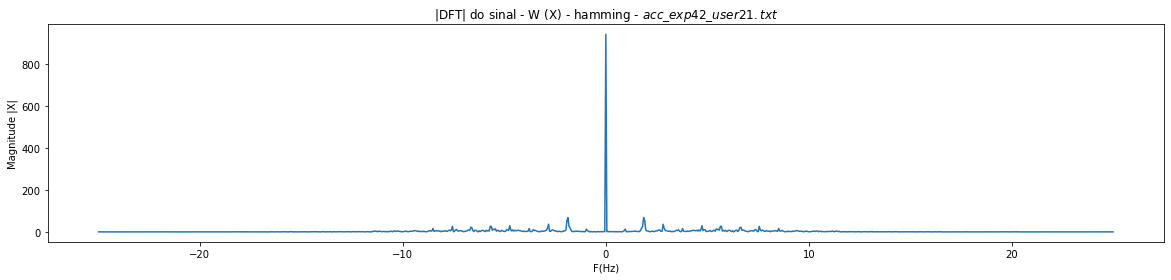

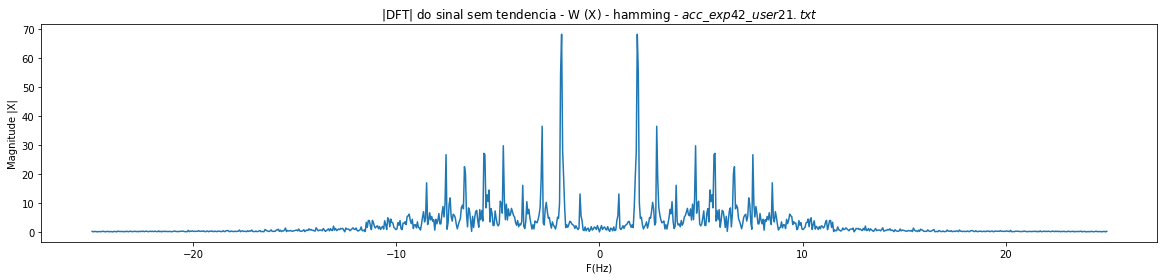

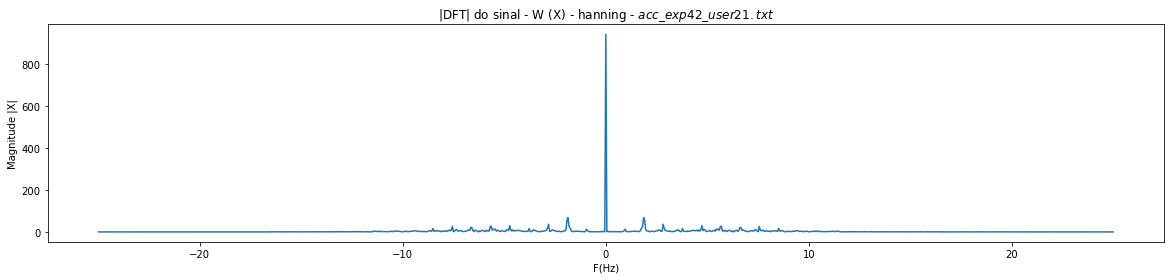

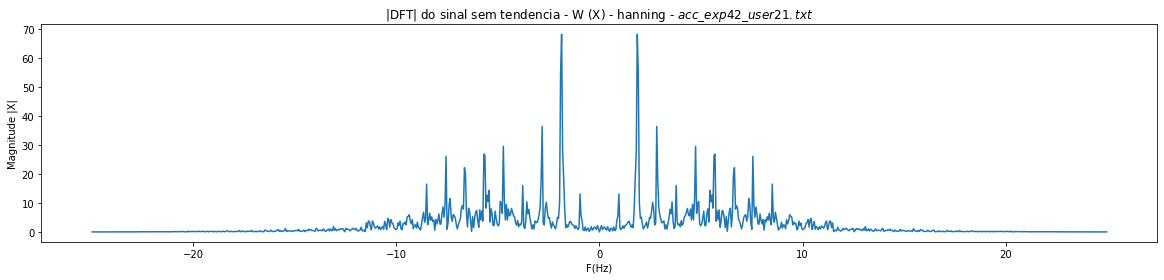

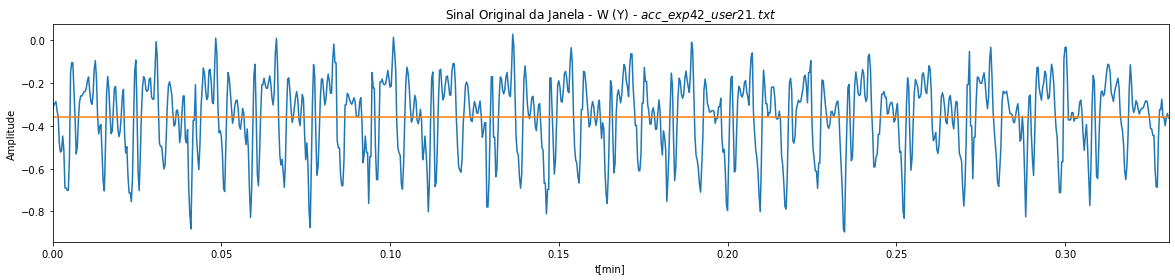

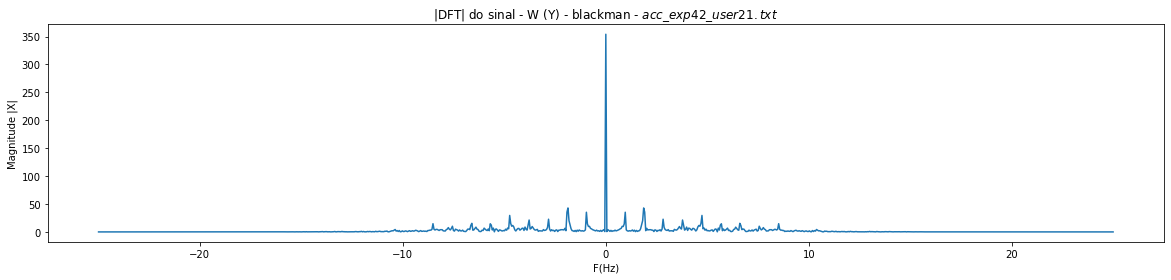

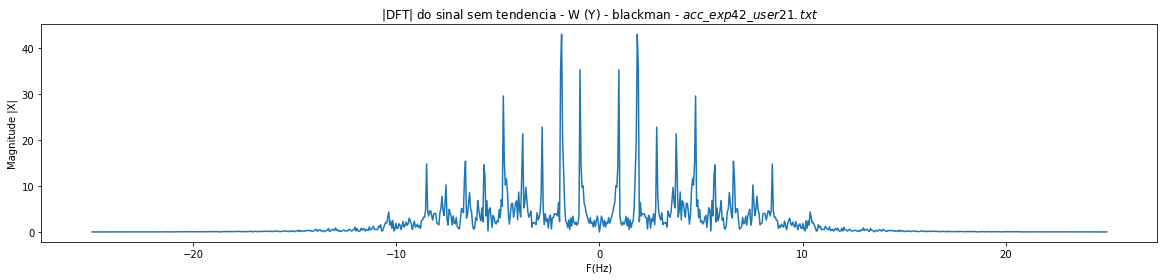

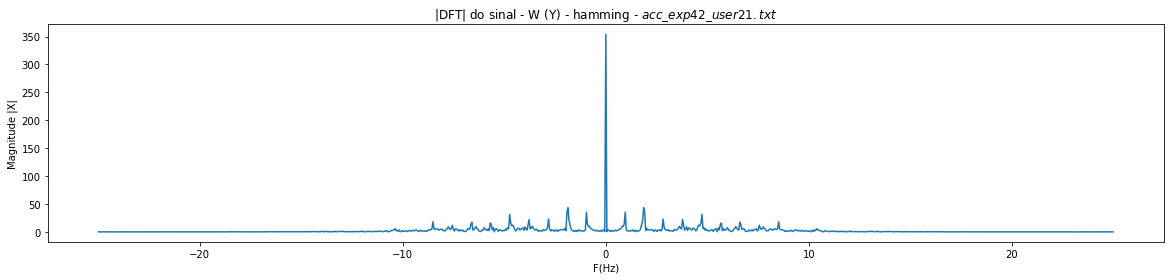

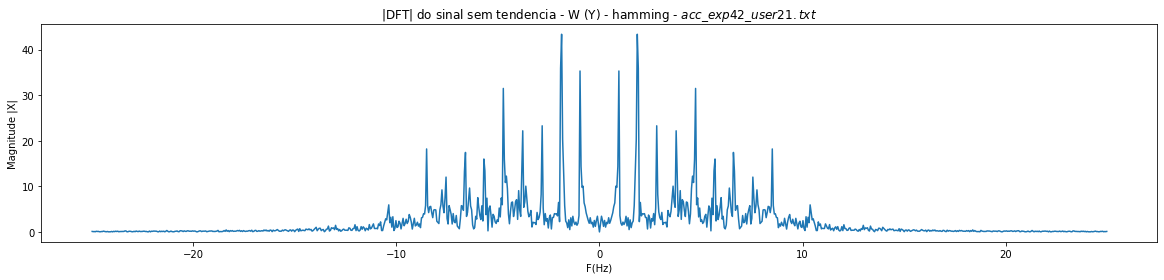

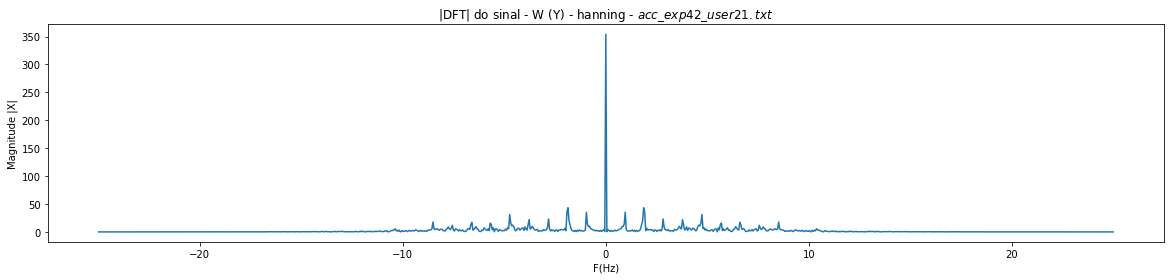

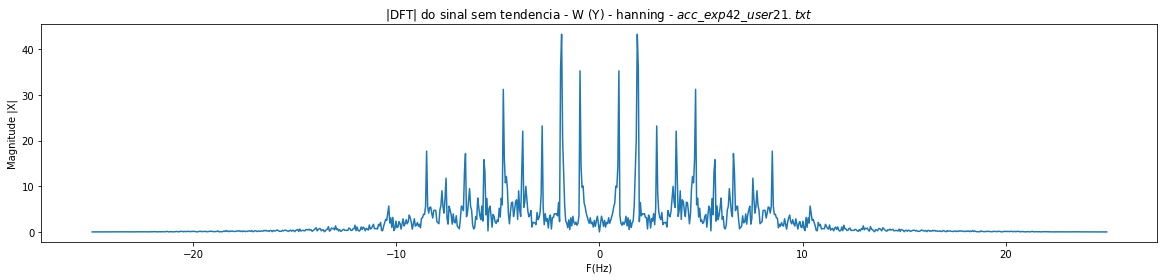

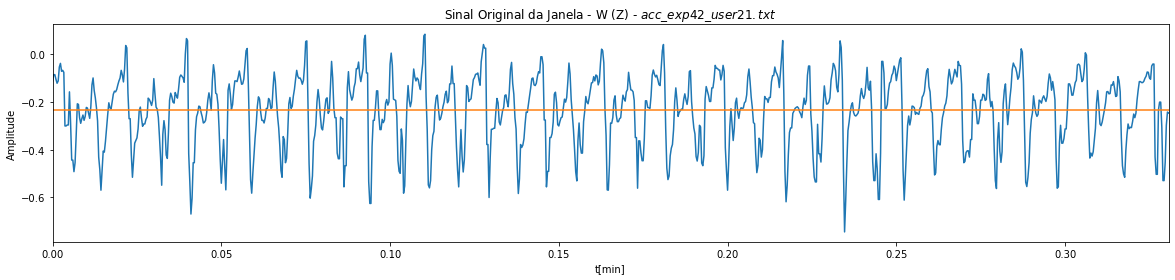

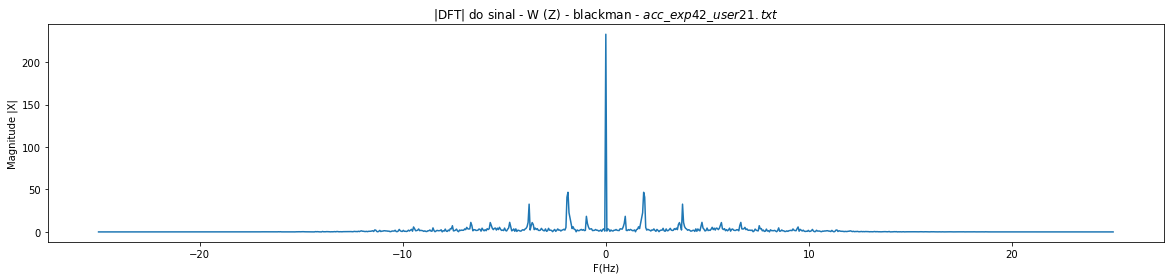

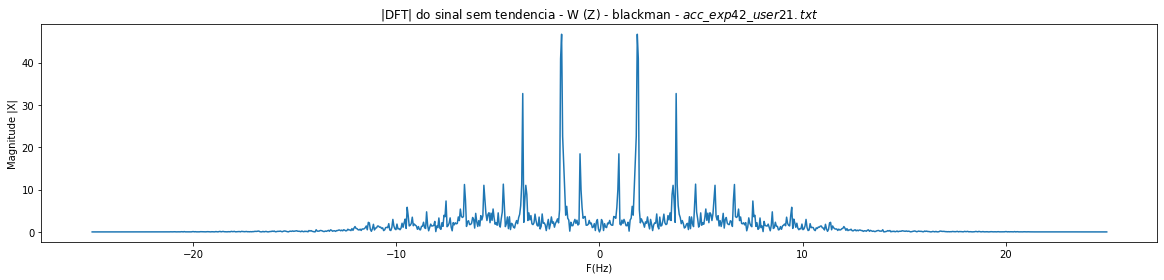

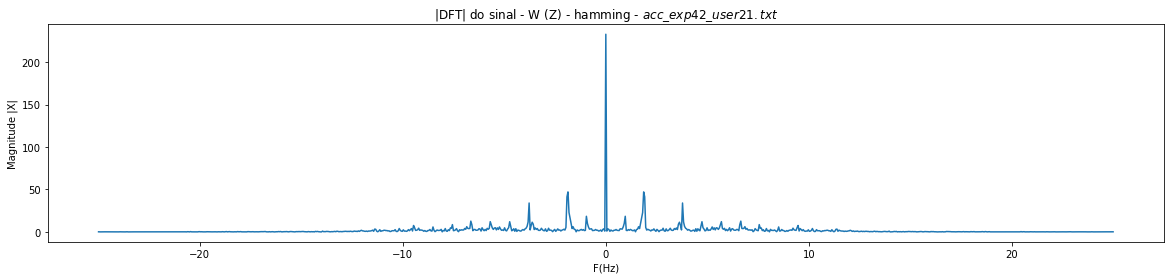

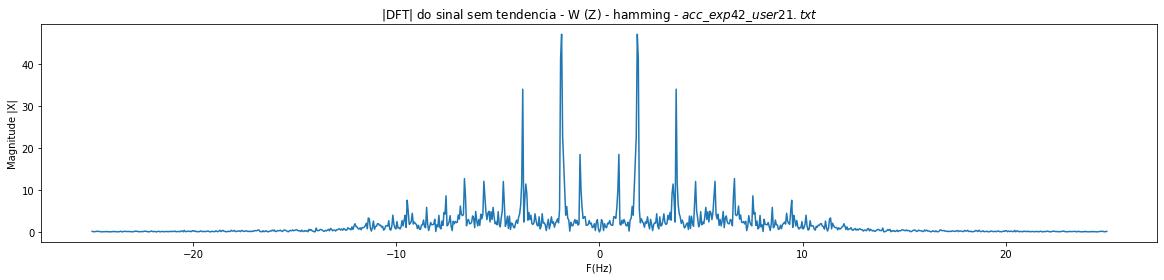

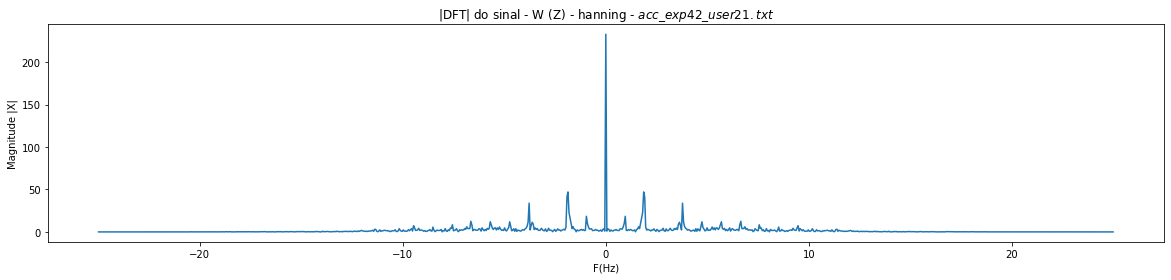

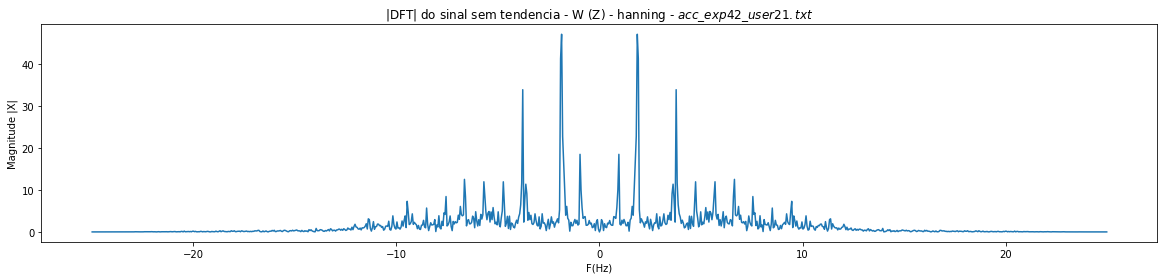

In [2]:
# Plot do gráfico para cada janela, usando a atividade walking, da primeira experiência, como exemplo
plot_windows(w_x[0])

# Plot do sinal de cada uma das ações
def plot_DFT_activities(x, y, z, n, exp, user, activity):
    # Array com os vários nomes das janelas escolhidas para o plot da DFT
    name_window = ['blackman', 'hamming', 'hanning']

    sensors = ['X', 'Y', 'Z']
    arr = [x, y, z]

    for s in range(len(sensors)):
        # range(1) -> plot dos gráficos apenas para a primeira ocorrência da atividade
        # range(len(arr[s][n])) -> plot dos gráficos para todas as ocorrência da atividade
        for i in range(1):
            fig = plt.figure(figsize=(20, 4))
            title = 'Sinal Original da Janela - %s (%s) - $acc\_exp%d\_user%d.txt$' % (
                activity, sensors[s], exp, user)

            plot_Original(arr[s][n], i, title)

            for name in name_window:
                fig2 = plt.figure(figsize=(20, 4))
                title = '|DFT| do sinal - %s (%s) - %s - $acc\_exp%d\_user%d.txt$' % (
                    activity, sensors[s], name, exp, user)

                plot_DFT_NoDetrend(arr[s][n], i, title, name)
                fig3 = plt.figure(figsize=(20, 4))
                title = '|DFT| do sinal sem tendencia - %s (%s) - %s - $acc\_exp%d\_user%d.txt$' % (
                    activity, sensors[s], name, exp, user)

                plot_DFT_Detrend(arr[s][n], i, title, name)

# Para dar plot dos gráficos de todos os ficheiros deve-se fazer range(8)
for i in range(1):
    # Para todas as atividades deve-se fazer range(len(atividades))
    for j in range(1):
        plot_DFT_activities(w_x, w_y, w_z, i, exp[i], user[i//2], atividades[j])

Foram também usadas 3 janelas distintas (Blackman, Hamming e Hanning), tendo sido alvos de estudo para escolher a janela que beneficia mais a análise dos gráficos, sem retirar nenhuma informação relevante e sem fazer aproximações "grosseiras" da janela original. O processo de _windowing_ consiste em alterar a forma de um sinal, sendo que quanto maior a janela melhor serão os resultados.

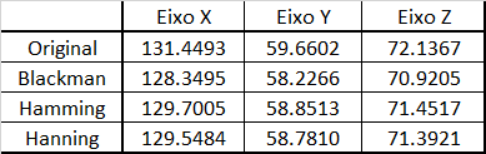

Tabela 1 - Magnitudes máximas de cada janela aplicada

Após a análise dos gráficos, optamos por utilizar a janela de Hamming ao longo do nosso projeto. Decidimos desta forma porque, após aplicarmos esta janela ao sinal e analizarmos o cálculo das magnitudes máximas para a atividade "Walking", nos 3 eixos, verificámos que existia uma maior aproximação dos valores dessa janela e dos valores do sinal sem nenhuma janela aplicada.
Ao contarmos o número de passos, verificámos que o número de passos está dentro, ou muito próximo, do intervalo de passos por minuto para uma pessoa normal (90 a 130 passos por minuto), de acordo com o seguinte excerto, retirado de um documento sugerido, pelos professores, para a realização deste projeto:

> “The cadence of an average person walking is within [90, 130] steps/min [14], i.e. a minimum of 1.5 steps/sec” - A Public Domain Dataset for Human Activity Recognition Using Smartphones - Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz

No excerto de código em baixo foi calculado o valor médio de passos e o seu desvio padrão para as 3 atividades dinâmicas, nos 3 eixos. Nesse cálculo não foi usada nenhuma das janelas referidas em cima. Para calcular o número de passos foi usada a função, da biblioteca scipy.signal, ___find_peaks()___, que retorna um tuplo em que o primeiro elemento é um array com os índices de todos os picos existentes na DFT do sinal. Com isso verificamos o número de picos e calculamos a média e o desvio padrão para cada atividade dinâmica, em cada eixo.

In [4]:
# São recebidos 3 arrays com 3 strings cada, sendo cada uma delas o valor da média
# e do desvio padrão dos valores registados por um sensor. Essas 3 strings correspondem,
# respetivamente, à atividade 'Walking', 'Walking Upstairs' e 'Walking Downstairs'
eixo_x = steps_per_min(w_x, w_u_x, w_d_x)
eixo_y = steps_per_min(w_y, w_u_y, w_d_y)
eixo_z = steps_per_min(w_z, w_u_z, w_d_z)

# Mostra (na forma de uma tabela) os valores da média e do desvio padrão
# dos valores máximos registados por cada sensor para as 3 atividades dinâmicas
# O primeiro valor corresponde à média e o segundo ao desvio padrão
print("%12s %4s %12s %4s %12s" % ("Eixo X", "|", "Eixo Y", "|", "Eixo Z"))
for i in range(2):
    print("%s | %s | %s | %s" % (eixo_x[i], eixo_y[i], eixo_z[i], atividades[i]))
print("%s  | %s  | %s  | %s" % (eixo_x[2], eixo_y[2], eixo_z[2], atividades[2]))

      Eixo X    |       Eixo Y    |       Eixo Z
152.84 +- 16.58 | 154.03 +- 15.94 | 151.09 +- 15.64 | W
101.44 +- 11.65 | 101.88 +- 12.02 | 101.75 +- 11.72 | W\_U
95.80 +- 19.30  | 96.32 +- 19.13  | 96.64 +- 20.38  | W\_D


### Exercícios 3.3,  3.5 e 3.6


In [5]:
def diferenciate_activities():
    fig = plt.figure(figsize=(10, 5))
    p = fig.add_subplot(projection='3d')

    for i in range(8):
        # WALKING
        for j in range(len(w_x[i])):
            window = np.hamming(len(w_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(w_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(w_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(w_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='none',
                      marker='o', edgecolor='blue')

        # WALKING UPSTAIRS
        for j in range(len(w_u_x[i])):
            window = np.hamming(len(w_u_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(w_u_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(w_u_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(w_u_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='none',
                      marker='o', edgecolor='black')

        # WALKING DOWNSTAIRS
        for j in range(len(w_d_x[i])):
            window = np.hamming(len(w_d_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(w_d_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(w_d_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(w_d_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='none',
                      marker='o', edgecolor='red')

        # SITTING
        for j in range(len(sit_x[i])):
            window = np.hamming(len(sit_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(sit_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(sit_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(sit_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='tan',
                      marker='+')

        # STAND
        for j in range(len(stand_x[i])):
            window = np.hamming(len(stand_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(stand_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(stand_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(stand_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='olive',
                      marker='+')

        # LAYING
        for j in range(len(lay_x[i])):
            window = np.hamming(len(lay_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(lay_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(lay_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(lay_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='skyblue',
                      marker='+')

        # STAND TO SIT
        for j in range(len(stand_sit_x[i])):
            window = np.hamming(len(stand_sit_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(stand_sit_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(stand_sit_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(stand_sit_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='none',
                      marker='d', edgecolor='slategrey')

        # SIT TO STAND
        for j in range(len(sit_stand_x[i])):
            window = np.hamming(len(sit_stand_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(sit_stand_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(sit_stand_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(sit_stand_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='none',
                      marker='d', edgecolor='pink')

        # SIT TO LAY
        for j in range(len(sit_lay_x[i])):
            window = np.hamming(len(sit_lay_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(sit_lay_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(sit_lay_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(sit_lay_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='none',
                      marker='d', edgecolor='gold')

        # LAY TO SIT
        for j in range(len(lay_sit_x[i])):
            window = np.hamming(len(lay_sit_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(lay_sit_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(lay_sit_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(lay_sit_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='none',
                      marker='d', edgecolor='purple')

        # STAND TO LAY
        for j in range(len(stand_lay_x[i])):
            window = np.hamming(len(stand_lay_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(stand_lay_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(stand_lay_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(stand_lay_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='none',
                      marker='d', edgecolor='orange')

        # LAY TO STAND
        for j in range(len(lay_stand_x[i])):
            window = np.hamming(len(lay_stand_x[i][j]))
            m_x = abs(fftshift(fft(sigs.detrend(lay_stand_x[i][j]) * window)))
            peaks_x, _ = sigs.find_peaks(m_x)

            m_y = abs(fftshift(fft(sigs.detrend(lay_stand_y[i][j]) * window)))
            peaks_y, _ = sigs.find_peaks(m_y)

            m_z = abs(fftshift(fft(sigs.detrend(lay_stand_z[i][j]) * window)))
            peaks_z, _ = sigs.find_peaks(m_z)
            p.scatter(m_x[min(peaks_x)], m_y[min(peaks_y)], m_z[min(peaks_z)], color='none',
                      marker='d', edgecolor='blue')


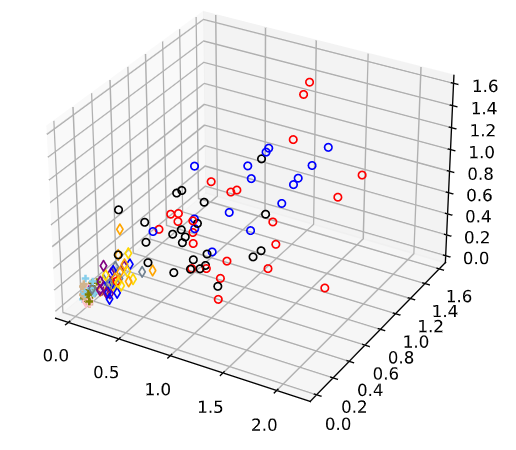

Na imagem acima podemos verificar o plot dos vários picos de cada atividade, para cada experiência, sendo que cada símbolo tem um tipo de atividade atribuído. Os círculos representam as atividades dinâmicas, os '+' as atividades estáticas e, por fim, os losangos representam as atividades de transição. Podemos facilmente identificar as atividades dinâmicas, visto que as magnitudes destas estão muito mais afastadas do 0, em todos os eixos, do que as outras atividades. Em relação às atividades estáticas, verificamos que as suas magnitudes se encontram muito perto do 0, tornando-as também facilmente indentificáveis. Como seria de esperar as magnitudes das atividades de transição estão em posições entre as magnitudes das atividades estáticas e as dinâmicas. Como nós usamos o valor mínimo de cada magnitude máxima as atividades dinâmicas estão muito mais afastadas das restantes, enquanto que nos máximos das magnitudes máximas as dinâmicas iriam estar mais aproximadas das de transição e as as estáticas continuariam a estar bastante próximas do 0.

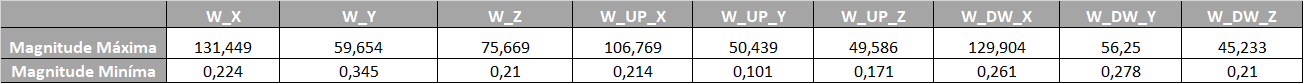

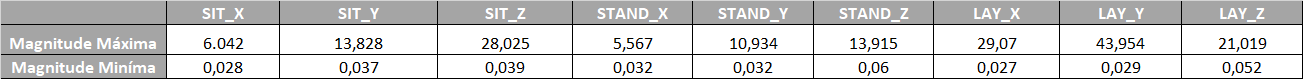

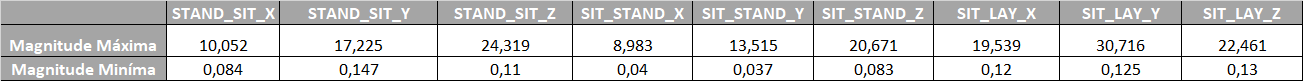

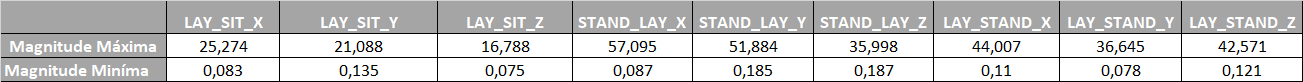

Através da análise das magnitudes máximas e mínimas de cada atividade é possível fazer uma distinção entre os diferentes tipos de atividades. Como foi verificado no gráfico a 3 dimensões as atividades dinâmicas apresentam valores substancialmente superiores, tanto nas magnitudes máximas como nas mínimas. No entanto, esta análise não pode ser levada em conta a 100% pois não é exata, devido ao cálculo da DFT correspondente ao sinal ser uma aproximação do real, tendo uma precisão, também, algo inferior a 100%, não trazendo muita fiabilidade aos valores.

Estes conceitos de exatidão e precisão podem ser relacionados com os de sensibilidade e especificidade, sendo que a sensibilidade poderia ser testada experimentalmente, tal como é feito em vários estudos relativos à área da saúde, no entanto, não é o objetivo deste projeto, daí ser apenas feita uma pequena referência destes dois conceitos.

### Exercício 4.1 e 4.2
A análise de um sinal através do uso de um espectograma é necessária para analisar com rigor as variações de frequência do sinal ao longo do tempo, sendo útil quando é necessário determinar quando uma frequência ocorre, dando a exata ordem em que uma frequência ocorre. Testámos várias janelas deslizantes e chegámos a um tamanho de janela 0.005 vezes menor que o tempo de atividade do utilizador a ser testado. Esta pequena diferença de janelas permite-nos identificar, com maior facilidade, as diferentes atividades no espetro. Usamos também uma sobreposição de 50%, que nos confere uma melhor continuidade temporal e, devido a nos fornecer alguma redundância, nos dá também alguma segurança na análise dos dados, de forma a evitar perdas de informação.

Através da análise dos 2 gráficos resultantes da função _plot_STFT()_ podemos verificar que de facto a ocorrência das atividades é igual para as duas ocasiões, sendo ainda mostrado as diferentes transições de atividades.

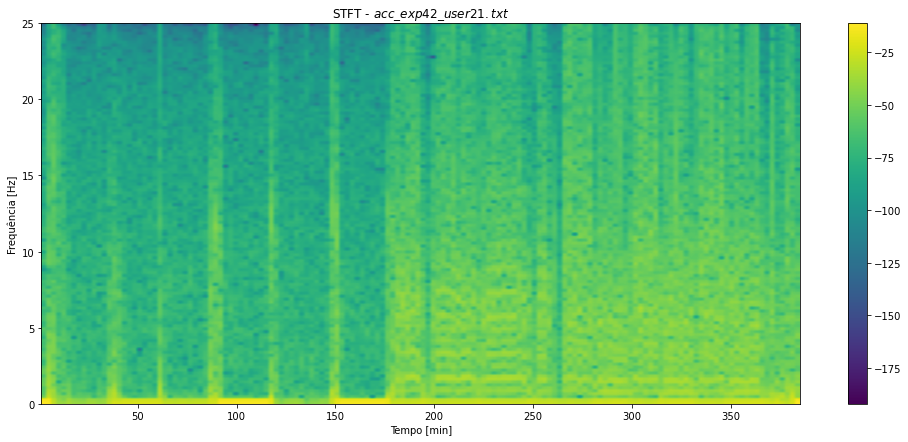

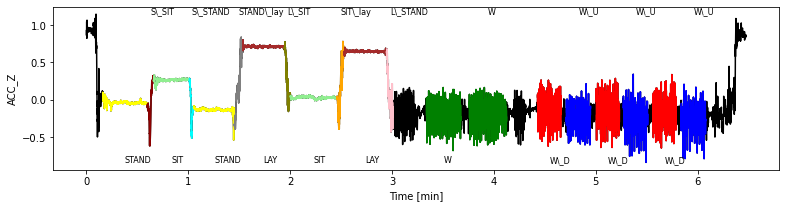

In [21]:
# Função usada para dar plot do espectograma da STFT
def plot_STFT(array, exp, user):
    az = []
    for i in array:
        az.append(i[2])

    z = np.array(az, dtype=object)
    
    period = 1 / frequency  # Período fundamental
    n = z.size
    t = n * period / 60  # Tempo total da atividade do utilizador
    t_frame = 0.005 * t  # Janela de tamanho 0.005 vezes menor que o tempo de atividade do utilizador

    # Tal como diz nos ficheiros de apoio ao projeto a sobreposição de 50% de modo a melhorar a continuidade temporal 
    # e minimizar a atenuação da janelas nas épocas afastadas do centro
    t_overlap = t_frame / 2
    n_frame = round(t_frame * frequency)


    h = np.hamming(n_frame)

    n_overlap = round(t_overlap * frequency)
    es = []  # Array para guardar o espetro temporal do sinal
    f = np.linspace(-frequency / 2, frequency / 2, n_frame)  # Cálculo da frequência
    x = np.where(f >= 0)  # Apenas serão considerados valores maiores ou iguais a 0 para o tratamento do sinal

    for j in range(0, n - n_frame, n_frame - n_overlap):
        x_frame = z[j : j + n_frame] * h
        m_x_frame = abs(fftshift(fft(x_frame)))
        es = np.hstack([es, m_x_frame[x]])

    plt.figure(figsize=(17, 7))
    plt.title("STFT - $acc\_exp%d\_user%d.txt$" % (exp, user))
    plt.specgram(es, Fs=frequency)
    plt.xlabel("Tempo [s]")
    plt.ylabel("Frequência [Hz]")
    plt.colorbar()

    # Inicializa os plots do z
    plt.figure(figsize=(13, 3))
    plt.xlabel(r'Time [min]')
    plt.ylabel(r'ACC_Z')
    plt.plot(tempo, z, 'black')
    # Dá plot do z
    for i in range(len(labels)):
        plt.plot(tempo[labels[i][1]:labels[i][2]],
                 z[labels[i][1]:labels[i][2]], colors[labels[i][0] - 1])
        if i % 2 == 0:
            plt.text((labels[i][1] + labels[i][2]) / (2 * 50 * 60), min(z),
                     atividades[labels[i][0] - 1], fontsize=8)
        else:
            plt.text((labels[i][1] + labels[i][2]) / (2 * 50 * 60), max(z),
                     atividades[labels[i][0] - 1], fontsize=8)

### Conclusão
Em suma, no desenvolver deste projeto conseguimos aprofundar o nosso conhecimento acerca da manipulação de dados em função do tempo e da sua frequência. Além disto, aprendemos bastante sobre STFTs e, acima de tudo DFTs e como estes podem influenciar a maneira como utilizamos os dados e informações ao nosso dispor.

### Funções utilizadas ao longo do projeto

In [ ]:
# EXERCÍCIO 1 ------------------------------------------------------------------------------------------
# Abre o ficheiro com dados de um sinal
def open_users_data(exp, user):
    aux = []
    # Nome do ficheiro a ser aberto
    filename = "acc_exp%d_user%d.txt" % (exp, user)
    with open(filename, "r") as file:
        # Guarda a data do user no array arr
        for i in file:
            aux.append([float(i.split()[0]), float(
                i.split()[1]), float(i.split()[2])])
        arr = np.array(aux)
    return arr


# Abre o ficheiro labels
def open_labels(exp, user):
    aux = []
    with open("labels.txt", "r") as labelsfile:
        for i in labelsfile:
            if int(i.split()[0]) == exp and int(i.split()[1]) == user:
                aux.append([int(i.split()[2]), int(
                    i.split()[3]), int(i.split()[4])])
        labels_arr = np.array(aux)
    return labels_arr


# EXERCÍCIO 2 ------------------------------------------------------------------------------------------
# Cria os gráficos de cada sinal com as devidas atividades identificadas
def plot_signals_activities(exp, user):
    labels = open_labels(exp, user)

    # Inicializa os plots do x
    plt.figure(figsize=(20, 12))
    plt.subplot(311)
    plt.ylabel(r'ACC_X')
    plt.title('Graphic of $acc\_exp%d\_user%d.txt$' % (exp, user))
    plt.plot(tempo, x, 'black')
    # Dá plot do x
    for i in range(len(labels)):
        plt.plot(tempo[labels[i][1]:labels[i][2]],
                 x[labels[i][1]:labels[i][2]], colors[labels[i][0] - 1])
        if i % 2 == 0:
            plt.text((labels[i][1] + labels[i][2]) / (2 * frequency * 60), min(x),
                     atividades[labels[i][0] - 1], fontsize=8)
        else:
            plt.text((labels[i][1] + labels[i][2]) / (2 * frequency * 60), max(x),
                     atividades[labels[i][0] - 1], fontsize=8)

    # Inicializa os plots do y
    plt.subplot(312)
    plt.ylabel(r'ACC_Y')
    plt.plot(tempo, y, 'black')
    # Dá plot do y
    for i in range(len(labels)):
        plt.plot(tempo[labels[i][1]:labels[i][2]],
                 y[labels[i][1]:labels[i][2]], colors[labels[i][0] - 1])
        if i % 2 == 0:
            plt.text((labels[i][1] + labels[i][2]) / (2 * 50 * 60), min(y),
                     atividades[labels[i][0] - 1], fontsize=8)
        else:
            plt.text((labels[i][1] + labels[i][2]) / (2 * 50 * 60), max(y),
                     atividades[labels[i][0] - 1], fontsize=8)

    # Inicializa os plots do z
    plt.subplot(313)
    plt.xlabel(r'Time [min]')
    plt.ylabel(r'ACC_Z')
    plt.plot(tempo, z, 'black')
    # Dá plot do z
    for i in range(len(labels)):
        plt.plot(tempo[labels[i][1]:labels[i][2]],
                 z[labels[i][1]:labels[i][2]], colors[labels[i][0] - 1])
        if i % 2 == 0:
            plt.text((labels[i][1] + labels[i][2]) / (2 * 50 * 60), min(z),
                     atividades[labels[i][0] - 1], fontsize=8)
        else:
            plt.text((labels[i][1] + labels[i][2]) / (2 * 50 * 60), max(z),
                     atividades[labels[i][0] - 1], fontsize=8)

# EXERCÍCIO 3.1 e 3.2 -------------------------------------------------------------------
# Plot do gráfico para cada tipo de janela janela
def plot_windows(act):
    aux = np.array(act[0])
    window_hamming = np.hamming(aux.size)
    window_hanning = np.hanning(aux.size)
    window_blackman = np.blackman(aux.size)
    plt.figure(figsize=(15,5))
    plt.plot(window_hamming)
    plt.plot(window_hanning)
    plt.plot(window_blackman)
    plt.title("Janelas")
    plt.legend(["Hamming", "Hanning", "Blackman"])

# Funções usadas na função plot_DFT_activities
def plot_Original(arr, i, title):
    window = np.array(arr[i])
    period = 1 / frequency
    n = window.size  # Período Fundamental
    t = np.linspace(0, period * (n - 1) / 60, n)
    plt.plot(t, window)
    plt.title(title)
    plt.xlabel('t[min]')
    plt.ylabel('Amplitude')
    plt.xlim(0, period * (n - 1) / 60)
    # linha de tendência
    trend = window - sigs.detrend(window, type='constant')
    plt.plot(t, trend)


def plot_DFT_NoDetrend(arr, i, title, name):
    aux = np.array(arr[i])
    if name == 'hamming':
        window = np.hamming(aux.size)
    elif name == 'blackman':
        window = np.blackman(aux.size)
    elif name == 'hanning':
        window = np.hanning(aux.size)
    X = abs(fftshift(fft(aux)) * window)
    N = X.size  # Período Fundamental
    if N % 2 == 0:  # Definição de Frequência
        f = np.arange(-frequency / 2,
                      frequency / 2, frequency / N)
    else:
        f = np.arange(-frequency / 2 + frequency / (2 * N),
                      frequency / 2 - frequency / (2 * N) + frequency / N, frequency / N)
    plt.plot(f, X)
    plt.title(title)
    plt.xlabel('F(Hz)')
    plt.ylabel('Magnitude |X|')


def plot_DFT_Detrend(arr, i, title, name):
    aux = np.array(arr[i])
    if name == 'hamming':
        window = np.hamming(aux.size)
    elif name == 'blackman':
        window = np.blackman(aux.size)
    elif name == 'hanning':
        window = np.hanning(aux.size)
    X = abs(fftshift(fft(sigs.detrend(aux))) * window)
    N = X.size  # Período Fundamental
    if N % 2 == 0:  # Definição de Frequência
        f = np.arange(-frequency / 2,
                      frequency / 2, frequency / N)
    else:
        f = np.arange(-frequency / 2 + frequency / (2 * N),
                      frequency / 2 - frequency / (2 * N) + frequency / N, frequency / N)
    plt.plot(f, X)
    plt.title(title)
    plt.xlabel('F(Hz)')
    plt.ylabel('Magnitude |X|')            
# ----------------------------------------------------------------------------------------

# Cálculo das magnitudes máximas
def calculate_max_mag(x, y, z):
    sensors = [x, y, z]
    for s in sensors:
        for i in range(len(s)):
            X = abs(fftshift(fft(sigs.detrend(s[i]))))
            max_magnitude = X[sigs.find_peaks(X)[0]]
            max_magnitude = max(max_magnitude)
            if s == x:
                max_mag_x.append(max_magnitude)
            elif s == y:
                max_mag_y.append(max_magnitude)
            else:
                max_mag_z.append(max_magnitude)

                
# Cálculo das magnitudes mínimas
def calculate_min_mag(x, y, z):
    sensors = [x, y, z]
    for s in sensors:
        for i in range(len(s)):
            X = abs(fftshift(fft(sigs.detrend(s[i]))))
            min_magnitude = X[sigs.find_peaks(X)[0]]
            min_magnitude = min(min_magnitude)
            if s == x:
                min_mag_x.append(min_magnitude)
            elif s == y:
                min_mag_y.append(min_magnitude)
            else:
                min_mag_z.append(min_magnitude)

# Print dos vários valores máximos de magnitude para cada atividade e eixo
for j in range(0, len(array_activities), 3):
        for i in range(8):
            calculate_max_mag(array_activities[j][i], array_activities[j+1][i], array_activities[j+2][i])
        print(atividades[j//3] + " MAX")
        print(max(max_mag_x), end=" | ")
        print(max(max_mag_y), end=" | ")
        print(max(max_mag_z))

        max_mag_x.clear()
        max_mag_y.clear()
        max_mag_z.clear()

print("----------------------------------------------------------------")

# Print dos vários valores mínimos de magnitude para cada atividade e eixo
for j in range(0, len(array_activities), 3):
    for i in range(8):
        calculate_min_mag(array_activities[j][i], array_activities[j+1][i], array_activities[j+2][i])
    print(atividades[j//3] + " MIN")
    print(min(min_mag_x), end=" | ")
    print(min(min_mag_y), end=" | ")
    print(min(min_mag_z))

    min_mag_x.clear()
    min_mag_y.clear()
    min_mag_z.clear()

    
# EXERCÍCIO 3.4 -------------------------------------------------------------------------------------------------------
# Função usada para calcular o número de passos por minuto de cada atividade dinâmica
# É possível usar esta função para calcular o número de passos de cada janela (foi usado como método de verificação que
# a janela pode ser aceite para a análise dos gráficos das DFT's) 
def steps_per_min(w, wu, wd):
    total_steps_w = []
    total_steps_wu = []
    total_steps_wd = []

    for i in range(8):
        # WALKING
        for j in range(len(w[i])):
            m = abs(fftshift(fft(sigs.detrend(w[i][j]))))
            peaks, _ = sigs.find_peaks(m)
            num_steps = peaks.size
            total_steps_w.append(num_steps / 2)

        # WALKING UPSTAIRS
        for j in range(len(wu[i])):
            m = abs(fftshift(fft(sigs.detrend(wu[i][j]))))
            peaks, _ = sigs.find_peaks(m)
            num_steps = peaks.size
            total_steps_wu.append(num_steps / 2)

        # WALKING DOWNSTAIRS
        for j in range(len(wd[i])):
            m = abs(fftshift(fft(sigs.detrend(wd[i][j]))))
            peaks, _ = sigs.find_peaks(m)
            num_steps = peaks.size
            total_steps_wd.append(num_steps / 2)

    mean_steps_w = np.mean(total_steps_w)
    deviation_steps_w = np.std(total_steps_w)
    mean_steps_wu = np.mean(total_steps_wu)
    deviation_steps_wu = np.std(total_steps_wu)
    mean_steps_wd = np.mean(total_steps_wd)
    deviation_steps_wd = np.std(total_steps_wd)

    return ['%.2f +- %.2f' % (mean_steps_w, deviation_steps_w), '%.2f +- %.2f' % (
        mean_steps_wu, deviation_steps_wu), '%.2f +- %.2f' % (mean_steps_wd, deviation_steps_wd)]
# ---------------------------------------------------------------------------------------------------------------------